<a href="https://colab.research.google.com/github/d4rk3dge/test_demo/blob/master/DeepLearningCifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd,seaborn as sns, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [26]:
#(train_images, train_labels),(test_images, test_labels) = keras.datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

train_images = x_train
train_labels = y_train
test_images = x_test
test_labels = y_test

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 32, 32 , 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32 , 3)


In [27]:
model = keras.Sequential([
    #keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4460 - accuracy: 0.4838
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0909 - accuracy: 0.6172
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9558 - accuracy: 0.6667
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8581 - accuracy: 0.6994
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7762 - accuracy: 0.7294
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7061 - accuracy: 0.7524
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6430 - accuracy: 0.7754
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5825 - accuracy: 0.7959
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.5261 - accuracy: 0.8140
Epoch 10/10
1563/1563 [==============================] - 66s 42m

In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 5s 13ms/step - loss: 1.0411 - accuracy: 0.6874
Test accuracy: 0.6873999834060669


In [32]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 14ms/step


1/1 [==============================] - 0s 40ms/step


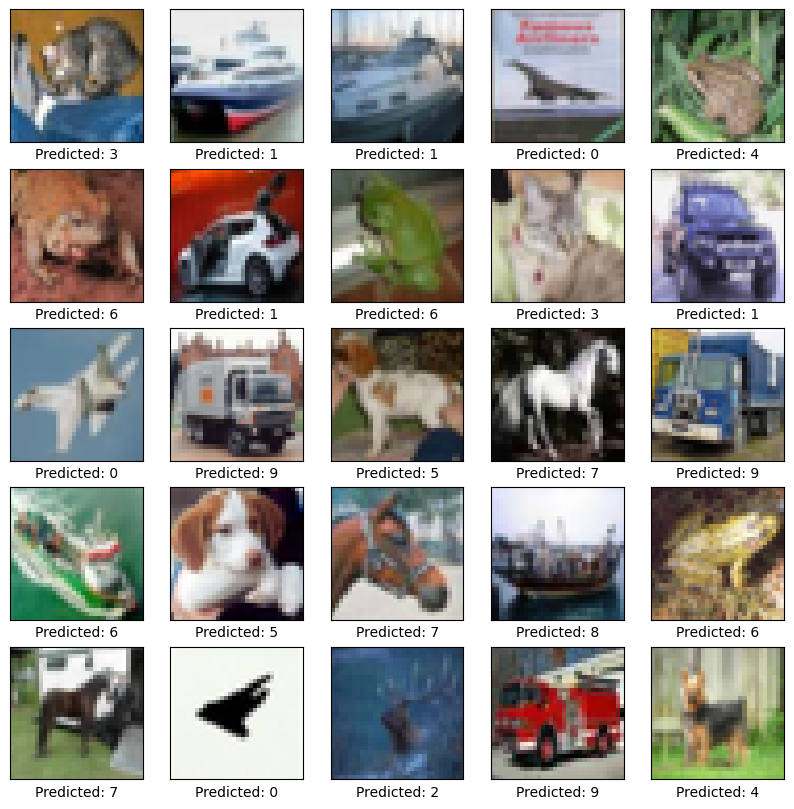

In [39]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(32, 32,3), cmap=plt.cm.binary)

    # Make predictions on test images
    predictions = model.predict(test_images[i].reshape(1, 32, 32, 3))
    predicted_label = tf.argmax(predictions, axis=1).numpy()[0]

    # Display the predicted label
    plt.xlabel(f'Predicted: {predicted_label}')

plt.show()

